In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
import pickle
from xgboost import XGBRegressor


In [6]:
train = pd.read_csv("loan_data_train.csv")
test = pd.read_csv("loan_data_test.csv")

In [7]:
train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

- geniune object columns
    - Loan length
    - Loan purpose
    - State 
    - Home Ownership
- Check other

In [9]:
def get_non_num(series):
    
    non_num_elems = []
    for elem in series:
        try:
            float(elem)
        except:
            non_num_elems.append(elem)
    return non_num_elems
        

In [10]:
for i in ['Amount.Requested', 'Amount.Funded.By.Investors','Monthly.Income','Open.CREDIT.Lines',
                    'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']:
    non_num_elems = get_non_num(train[i])
    print("column:",i)
    print("Non Numeric Elements:",non_num_elems)
    print("**********")

column: Amount.Requested
Non Numeric Elements: ['.', '.', '.', '.']
**********
column: Amount.Funded.By.Investors
Non Numeric Elements: ['.', '.', '.']
**********
column: Monthly.Income
Non Numeric Elements: []
**********
column: Open.CREDIT.Lines
Non Numeric Elements: ['.', '.', '.']
**********
column: Revolving.CREDIT.Balance
Non Numeric Elements: ['.', '.']
**********
column: Inquiries.in.the.Last.6.Months
Non Numeric Elements: []
**********


In [11]:
for i in ['Amount.Requested', 'Amount.Funded.By.Investors','Monthly.Income','Open.CREDIT.Lines',
                    'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']:
    non_num_elems = get_non_num(test[i])
    print("column:",i)
    print("Non Numeric Elements:",non_num_elems)
    print("**********")

column: Amount.Requested
Non Numeric Elements: []
**********
column: Amount.Funded.By.Investors
Non Numeric Elements: ['.']
**********
column: Monthly.Income
Non Numeric Elements: []
**********
column: Open.CREDIT.Lines
Non Numeric Elements: ['.', '.']
**********
column: Revolving.CREDIT.Balance
Non Numeric Elements: []
**********
column: Inquiries.in.the.Last.6.Months
Non Numeric Elements: []
**********


In [12]:
for i in ['Amount.Requested', 'Amount.Funded.By.Investors','Monthly.Income','Open.CREDIT.Lines',
                    'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']:
    train[i] =  pd.to_numeric(train[i],errors = 'coerce')

In [13]:
for i in ['Amount.Requested', 'Amount.Funded.By.Investors','Monthly.Income','Open.CREDIT.Lines',
                    'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']:
    test[i]= pd.to_numeric(test[i],errors = 'coerce')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2195 non-null   float64
 2   Amount.Funded.By.Investors      2196 non-null   float64
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2193 non-null   float64
 12  Revolving.CREDIT.Balance        21

In [15]:
for i in ['Interest.Rate','Debt.To.Income.Ratio']:
    train[i] = train[i].str.replace('%','')

In [16]:
for i in ['Debt.To.Income.Ratio']:
    test[i] = test[i].str.replace('%','')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2195 non-null   float64
 2   Amount.Funded.By.Investors      2196 non-null   float64
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2193 non-null   float64
 12  Revolving.CREDIT.Balance        21

In [18]:
for i in ['Interest.Rate','Debt.To.Income.Ratio']:
    train[i] =  pd.to_numeric(train[i],errors = 'coerce')
for i in ['Debt.To.Income.Ratio']:
    test[i] =  pd.to_numeric(test[i],errors = 'coerce')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2195 non-null   float64
 2   Amount.Funded.By.Investors      2196 non-null   float64
 3   Interest.Rate                   2200 non-null   float64
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   float64
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2193 non-null   float64
 12  Revolving.CREDIT.Balance        21

In [20]:
train['Employment.Length'].value_counts()

10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: Employment.Length, dtype: int64

In [21]:
train.loc[train['Employment.Length'] == ".",'Employment.Length']          = 10
train.loc[train['Employment.Length'] == "< 1 year",'Employment.Length']   = 0.5
train.loc[train['Employment.Length'] == "1 year",'Employment.Length']     = 1
train.loc[train['Employment.Length'] == "2 years",'Employment.Length']    = 2
train.loc[train['Employment.Length'] == "3 years",'Employment.Length']    = 3
train.loc[train['Employment.Length'] == "4 years",'Employment.Length']    = 4
train.loc[train['Employment.Length'] == "5 years",'Employment.Length']    = 5
train.loc[train['Employment.Length'] == "6 years",'Employment.Length']    = 6
train.loc[train['Employment.Length'] == "7 years",'Employment.Length']    = 7
train.loc[train['Employment.Length'] == "8 years",'Employment.Length']    = 8
train.loc[train['Employment.Length'] == "9 years",'Employment.Length']    = 9
train.loc[train['Employment.Length'] == "10+ years",'Employment.Length']  = 10


In [22]:
test.loc[test['Employment.Length'] == ".",'Employment.Length']          = 10
test.loc[test['Employment.Length'] == "< 1 year",'Employment.Length']   = 0.5
test.loc[test['Employment.Length'] == "1 year",'Employment.Length']     = 1
test.loc[test['Employment.Length'] == "2 years",'Employment.Length']    = 2
test.loc[test['Employment.Length'] == "3 years",'Employment.Length']    = 3
test.loc[test['Employment.Length'] == "4 years",'Employment.Length']    = 4
test.loc[test['Employment.Length'] == "5 years",'Employment.Length']    = 5
test.loc[test['Employment.Length'] == "6 years",'Employment.Length']    = 6
test.loc[test['Employment.Length'] == "7 years",'Employment.Length']    = 7
test.loc[test['Employment.Length'] == "8 years",'Employment.Length']    = 8
test.loc[test['Employment.Length'] == "9 years",'Employment.Length']    = 9
test.loc[test['Employment.Length'] == "10+ years",'Employment.Length']  = 10

In [23]:
test['Employment.Length'].value_counts(),train['Employment.Length'].value_counts()

(10.0    79
 3.0     32
 6.0     29
 4.0     29
 2.0     26
 5.0     21
 0.5     20
 1.0     18
 7.0     18
 8.0     13
 9.0      6
 Name: Employment.Length, dtype: int64,
 10.0    576
 0.5     229
 2.0     217
 3.0     203
 5.0     181
 4.0     162
 1.0     159
 6.0     134
 7.0     109
 8.0      95
 9.0      66
 Name: Employment.Length, dtype: int64)

In [24]:
train['Open.CREDIT.Lines'] =  pd.to_numeric(train['Open.CREDIT.Lines'],errors = 'coerce')
train['Employment.Length'] =  pd.to_numeric(train['Employment.Length'],errors = 'coerce')

In [25]:
test['Open.CREDIT.Lines'] =  pd.to_numeric(test['Open.CREDIT.Lines'],errors = 'coerce')
test['Employment.Length'] =  pd.to_numeric(test['Employment.Length'],errors = 'coerce')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2195 non-null   float64
 2   Amount.Funded.By.Investors      2196 non-null   float64
 3   Interest.Rate                   2200 non-null   float64
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   float64
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2193 non-null   float64
 12  Revolving.CREDIT.Balance        21

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              300 non-null    int64  
 1   Amount.Requested                300 non-null    int64  
 2   Amount.Funded.By.Investors      299 non-null    float64
 3   Loan.Length                     300 non-null    object 
 4   Loan.Purpose                    300 non-null    object 
 5   Debt.To.Income.Ratio            300 non-null    float64
 6   State                           300 non-null    object 
 7   Home.Ownership                  300 non-null    object 
 8   Monthly.Income                  300 non-null    float64
 9   FICO.Range                      300 non-null    object 
 10  Open.CREDIT.Lines               298 non-null    float64
 11  Revolving.CREDIT.Balance        300 non-null    int64  
 12  Inquiries.in.the.Last.6.Months  300 

In [28]:
fico_train = (train['FICO.Range'].str.split('-',expand = True))
fico_train

,0,1
0,720,724
1,710,714
2,690,694
3,710,714
4,730,734
...,...,...
2195,675,679
2196,700,704
2197,675,679
2198,670,674


In [29]:
fico_test = (test['FICO.Range'].str.split('-',expand = True))
fico_test

,0,1
0,690,694
1,710,714
2,750,754
3,790,794
4,720,724
...,...,...
295,705,709
296,705,709
297,670,674
298,675,679


In [30]:
fico_train['Max'] = pd.to_numeric(fico_train[1])
fico_train['min'] = pd.to_numeric(fico_train[0])
fico_test['Max'] = pd.to_numeric(fico_test[1])
fico_test['min'] = pd.to_numeric(fico_test[0])

In [31]:
fico_train['avg']  = (fico_train['Max']+fico_train['min'])/2
fico_test['avg']  = (fico_test['Max']+fico_test['min'])/2

In [32]:
train['FICO_Score'] = fico_train['avg']
test['FICO_Score'] = fico_test['avg']

In [33]:
train.drop('FICO.Range',axis = 1,inplace = True)
test.drop('FICO.Range',axis = 1,inplace = True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2195 non-null   float64
 2   Amount.Funded.By.Investors      2196 non-null   float64
 3   Interest.Rate                   2200 non-null   float64
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   float64
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  Open.CREDIT.Lines               2193 non-null   float64
 11  Revolving.CREDIT.Balance        2195 non-null   float64
 12  Inquiries.in.the.Last.6.Months  21

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              300 non-null    int64  
 1   Amount.Requested                300 non-null    int64  
 2   Amount.Funded.By.Investors      299 non-null    float64
 3   Loan.Length                     300 non-null    object 
 4   Loan.Purpose                    300 non-null    object 
 5   Debt.To.Income.Ratio            300 non-null    float64
 6   State                           300 non-null    object 
 7   Home.Ownership                  300 non-null    object 
 8   Monthly.Income                  300 non-null    float64
 9   Open.CREDIT.Lines               298 non-null    float64
 10  Revolving.CREDIT.Balance        300 non-null    int64  
 11  Inquiries.in.the.Last.6.Months  300 non-null    int64  
 12  Employment.Length               291 

In [36]:
train.drop('ID',axis = 1,inplace = True)
test.drop('ID',axis = 1,inplace = True)

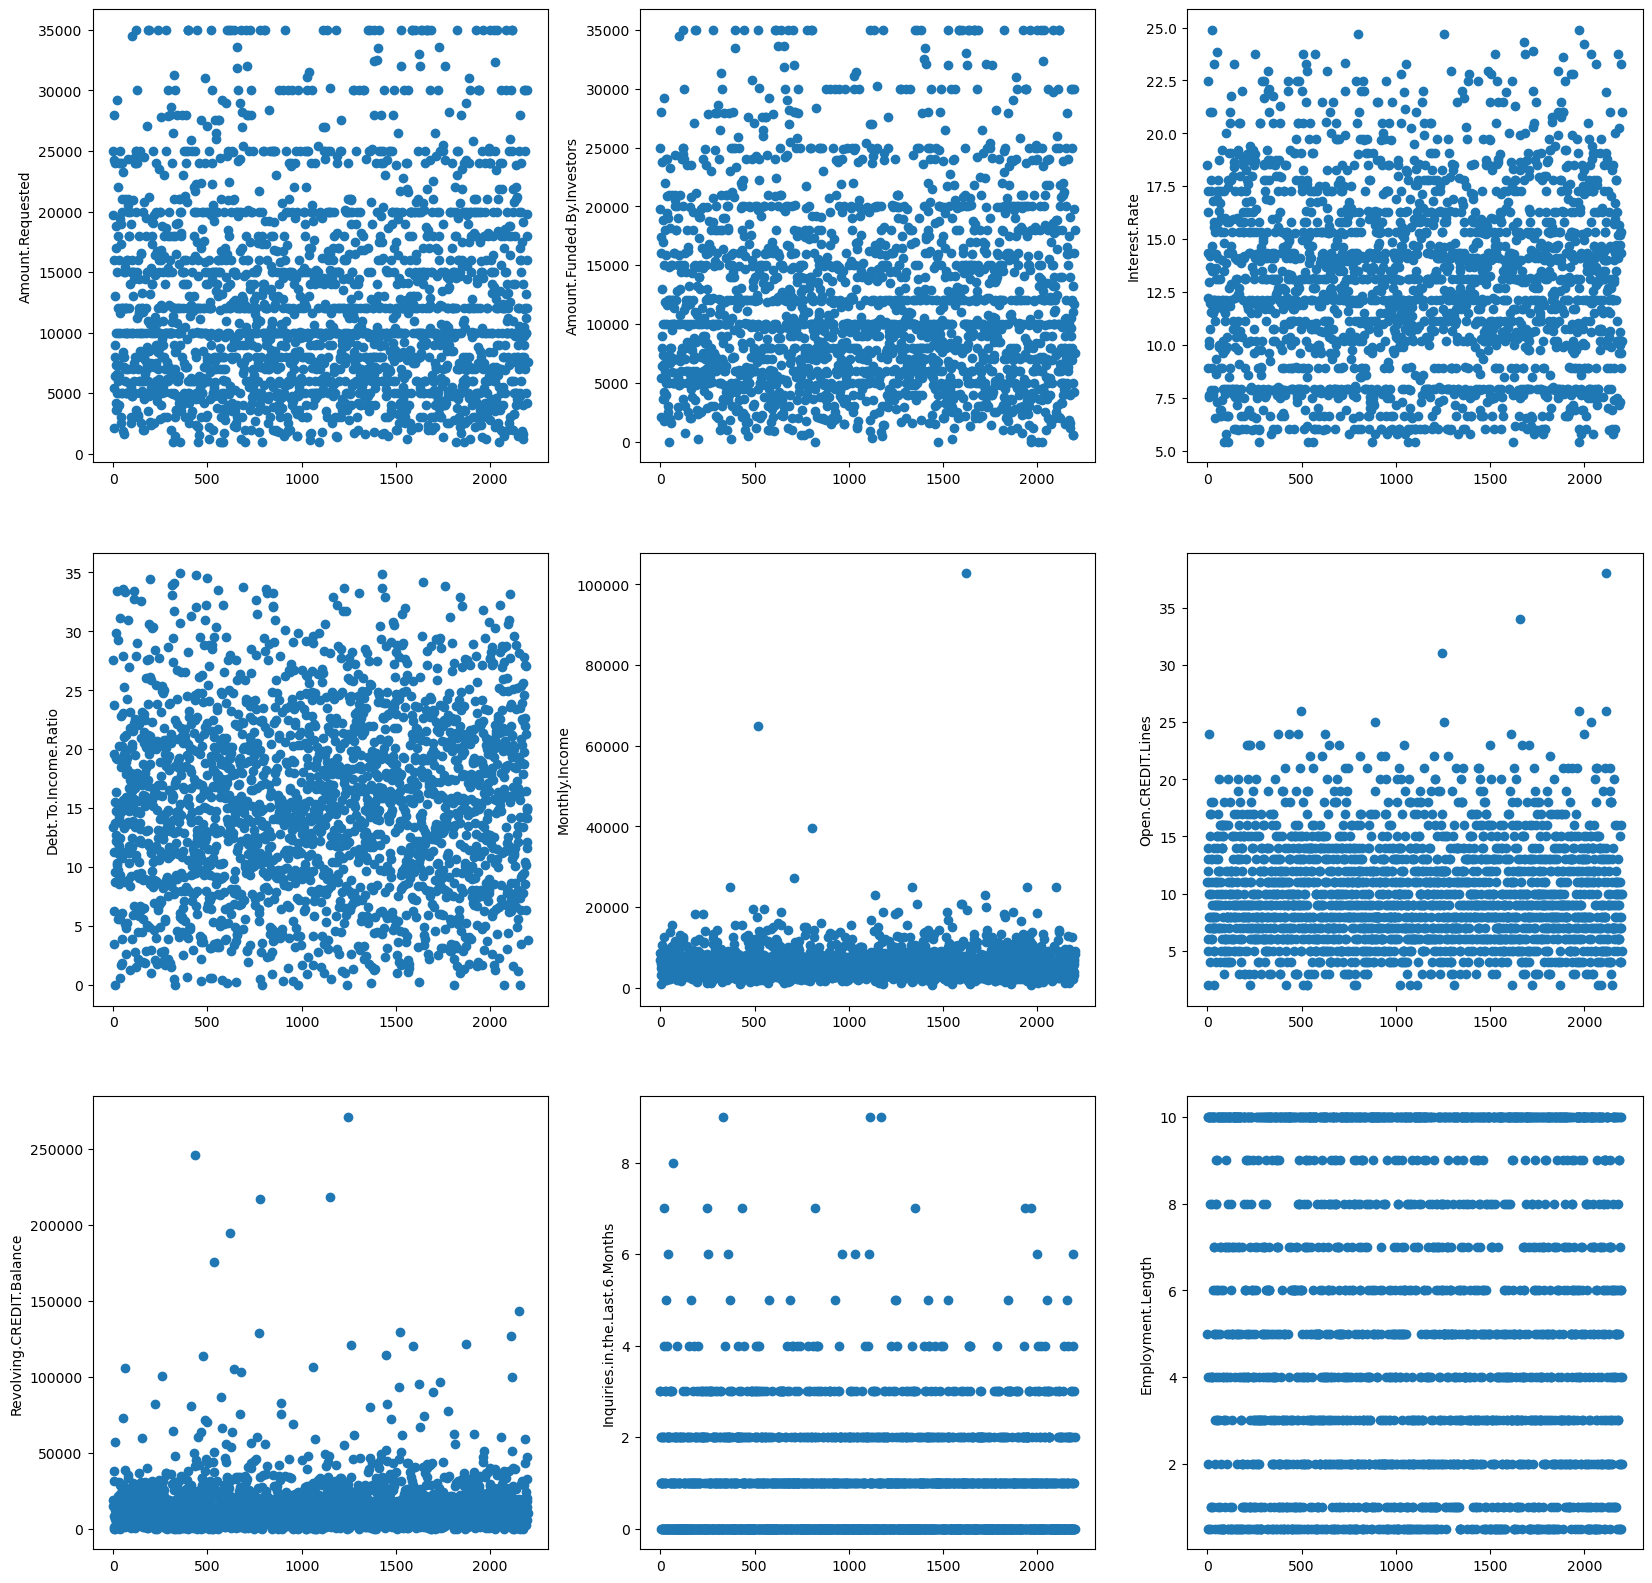

In [37]:
numeric_cols = train.select_dtypes(include = np.number) ### selects numeric columns


column_names = list(numeric_cols.columns)



col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [38]:
train.loc[train['Monthly.Income']>=40000,'Monthly.Income'] = 40000

In [39]:
test.loc[test['Monthly.Income']>=40000,'Monthly.Income'] = 40000

In [40]:
train.loc[train['Open.CREDIT.Lines']>=30,'Open.CREDIT.Lines'] = 30

In [41]:
test.loc[test['Open.CREDIT.Lines']>=30,'Open.CREDIT.Lines'] = 30

In [42]:
train.loc[train['Revolving.CREDIT.Balance']>=150000,'Revolving.CREDIT.Balance'] = 150000

In [43]:
test.loc[test['Revolving.CREDIT.Balance']>=150000,'Revolving.CREDIT.Balance'] = 150000

In [44]:
for col in numeric_cols:
    median_val = train[col].median()
    train[col].fillna(median_val,inplace = True)

In [45]:
for col in numeric_cols:
    if col != 'Interest.Rate':
        median_val = test[col].median()
        test[col].fillna(median_val,inplace = True)

In [46]:
test.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
FICO_Score                        0
dtype: int64

In [47]:
train['Loan.Length'].mode()

0    36 months
Name: Loan.Length, dtype: object

In [48]:
for col in train.columns:
    if col not in numeric_cols:
        print(col)
        mode_val = train[col].mode()
        print(mode_val)
        

Loan.Length
0    36 months
Name: Loan.Length, dtype: object
Loan.Purpose
0    debt_consolidation
Name: Loan.Purpose, dtype: object
State
0    CA
Name: State, dtype: object
Home.Ownership
0    MORTGAGE
Name: Home.Ownership, dtype: object


In [49]:
train['Loan.Length'].fillna('36 months',inplace = True)
train['Loan.Purpose'].fillna('debt_consolidation',inplace = True)
train['State'].fillna('CA',inplace = True)
train['Home.Ownership'].fillna('MORTGAGE',inplace = True)

In [50]:
train.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
FICO_Score                        0
dtype: int64

In [51]:
for col in train.columns:
    if col not in numeric_cols:
        value = train[col].value_counts()
        print(value)

36 months    1723
60 months     476
.               1
Name: Loan.Length, dtype: int64
debt_consolidation    1148
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan.Purpose, dtype: int64
CA    377
NY    231
FL    149
TX    146
PA     88
IL     87
GA     82
NJ     81
VA     70
MA     64
OH     59
NC     59
MD     59
CO     54
WA     52
CT     44
AZ     44
MI     38
AL     34
MN     30
MO     29
NV     29
SC     27
WI     25
OR     25
KS     21
OK     20
LA     20
KY     20
NH     14
RI     13
UT     13
NM     12
WV     12
HI     12
AR     11
DC      9
AK      8
DE      7
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
.       1
Name: State, dtype: int64
MORTGAGE    1019


- State cannot be dropped

- Remaning columns are genuine numeric and unorderd therefore using OneHotEncoder

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2200 non-null   float64
 1   Amount.Funded.By.Investors      2200 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2200 non-null   object 
 4   Loan.Purpose                    2200 non-null   object 
 5   Debt.To.Income.Ratio            2200 non-null   float64
 6   State                           2200 non-null   object 
 7   Home.Ownership                  2200 non-null   object 
 8   Monthly.Income                  2200 non-null   float64
 9   Open.CREDIT.Lines               2200 non-null   float64
 10  Revolving.CREDIT.Balance        2200 non-null   float64
 11  Inquiries.in.the.Last.6.Months  2200 non-null   float64
 12  Employment.Length               22

In [53]:
scaler = StandardScaler()

In [54]:
col_names = list(numeric_cols)
col_names.remove("Interest.Rate")
scaler.fit(train[col_names])


StandardScaler()

In [55]:
scaler.get_feature_names_out()

array(['Amount.Requested', 'Amount.Funded.By.Investors',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'FICO_Score'], dtype=object)

In [56]:
scaled_train = pd.DataFrame(scaler.transform(train[col_names]))
name_train = scaler.get_feature_names_out()
scaled_train.columns = name_train
train.drop(col_names,axis = 1,inplace =True)
train = pd.concat([train,scaled_train],axis = 1)


In [57]:
train.head()

,Interest.Rate,Loan.Length,Loan.Purpose,State,Home.Ownership,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO_Score
0,18.49,60 months,debt_consolidation,VA,MORTGAGE,1.594105,1.664218,1.621506,0.851678,0.208020,0.004486,1.725576,-0.117007,0.394720
1,17.27,60 months,debt_consolidation,NY,MORTGAGE,0.925074,0.988281,-0.263539,0.306524,0.880697,0.234362,1.725576,-0.404461,0.111073
2,14.33,36 months,major_purchase,LA,OWN,-1.324147,-1.284155,-1.579212,-1.366948,0.656471,-0.848137,0.084302,-1.410551,-0.456219
3,16.29,36 months,credit_card,NV,MORTGAGE,1.976409,2.050468,0.565243,0.407394,0.432246,1.373257,0.084302,1.320264,0.111073
4,12.23,60 months,credit_card,OH,MORTGAGE,1.498529,0.689816,1.119981,0.042803,-0.913107,0.948464,0.904939,1.320264,0.678366


In [58]:
scaled_test = pd.DataFrame(scaler.transform(test[col_names]))
name_test = scaler.get_feature_names_out()
scaled_test.columns = name_test
test.drop(col_names,axis = 1,inplace = True)
test = pd.concat([test,scaled_test],axis = 1)


In [59]:
test.head()

,Loan.Length,Loan.Purpose,State,Home.Ownership,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO_Score
0,60 months,moving,NY,RENT,-0.954586,-0.910780,-0.369963,-0.370398,0.656471,-0.443592,-0.736335,-1.410551,-0.456219
1,60 months,debt_consolidation,CA,RENT,0.702063,0.762969,-1.388978,-0.124860,-0.913107,-0.210739,-0.736335,1.320264,0.111073
2,60 months,debt_consolidation,LA,MORTGAGE,-0.674230,-0.627530,1.302233,-0.564848,0.656471,-0.467592,-0.736335,0.170447,1.245659
3,36 months,debt_consolidation,NY,MORTGAGE,-0.674230,-0.627530,0.252620,-0.662071,0.880697,-0.613200,-0.736335,1.320264,2.380244
4,60 months,debt_consolidation,MI,MORTGAGE,1.211802,1.277968,0.386981,0.115721,-0.240431,0.300525,-0.736335,0.745356,0.394720


In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
encoder = OneHotEncoder(min_frequency=20,handle_unknown = 'infrequent_if_exist',sparse_output = False)

In [62]:
x = ['Loan.Length', 'Loan.Purpose','State','Home.Ownership']
encoder.fit(train[x])


OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=20,
              sparse_output=False)

In [63]:
k1 = pd.DataFrame(encoder.transform(train[x]))
names = encoder.get_feature_names_out(x)
k1.columns = names



In [64]:
k2 = pd.DataFrame(encoder.transform(test[x]))
k2.columns = names

In [65]:
train = pd.concat([train,k1],axis = 1 )
train.drop(x,axis =1,inplace = True)

In [66]:
test = pd.concat([test,k2],axis = 1 )
test.drop(x,axis =1,inplace = True)

In [67]:
test.shape,train.shape

((300, 57), (2200, 58))

In [68]:
x_train,val = train_test_split(train,test_size = 0.2,random_state = 1235)

In [69]:
train_features = x_train.drop('Interest.Rate',axis =1)
train_target   = x_train['Interest.Rate']
val_features   = val.drop('Interest.Rate',axis =1)
val_target     = val['Interest.Rate']
features       = train.drop('Interest.Rate',axis =1)
target         = train['Interest.Rate']

In [70]:
lreg = LinearRegression()

In [71]:
lreg.fit(train_features,train_target)

LinearRegression()

In [72]:
pred_val = lreg.predict(val_features)
pred_train = lreg.predict(train_features)

In [73]:
MAPE(pred_train,train_target)

0.14385978060378757

In [74]:
MAPE(pred_val,val_target)

0.14216720812298153

In [75]:
dtr = DecisionTreeRegressor(max_depth= 7, min_samples_split= 26)
rfr = RandomForestRegressor()


In [76]:
param_dtr = {'max_depth' : [7],'min_samples_split':[22] }



# param_rfr = {'n_estimators' : [50,75,100],
#         'max_depth' : [5,10,15,20],
#         'min_samples_split':[10,15,20,25]
#             }
search_dtr =GridSearchCV(estimator = dtr,
                     param_grid = param_dtr,
                     scoring = 'neg_mean_absolute_percentage_error', 
                    return_train_score=True,
                    cv = 5)

search_dtr.fit(features,target)

## bestdtr= 'max_depth' : [7],'min_samples_split':[22,]

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_split=26),
             param_grid={'max_depth': [7], 'min_samples_split': [22]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [79]:
result_dtr = pd.DataFrame(search_dtr.cv_results_)


In [78]:
# result_dtr[['params','mean_train_score','mean_test_score']].sort_values(by = 'mean_test_score',ascending=False)

In [83]:
# result_dtr.sort_values(ascending=False,by  = 'mean_test_score')

In [84]:
# x = pd.DataFrame({'Params': search.cv_results_['params'],
#               'TrainMAPE':search.cv_results_['mean_train_score'],
#               'ValMAPE':search.cv_results_['mean_test_score']})

# x.to_csv('Best_decison_tree.csv', index=None)

In [80]:

with open('Decision_Tree_model.pickle','wb') as f:
    pickle.dump(search_dtr,f)

In [81]:
pred = search_dtr.predict(test)

In [82]:
test_pred = pd.DataFrame({'test': test.index,'pred' : pred})

In [83]:
param_rfr = {'n_estimators' : [170],
        'max_depth' : [6],
        'min_samples_split':[6,],
          'min_samples_leaf':[6]  }
search_rfr =GridSearchCV(estimator = rfr,
                     param_grid = param_rfr,
                     scoring = 'neg_mean_absolute_percentage_error', 
                    return_train_score=True,
                    cv = 5)

search_rfr.fit(features,target)

## best model 'n_estimators' : [170,],
##        'max_depth' : [6],
##        'min_samples_split':[6,],
##         'min_samples_leaf':[6,]


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6], 'min_samples_leaf': [6],
                         'min_samples_split': [6], 'n_estimators': [170]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [84]:
result_rfr = pd.DataFrame(search_rfr.cv_results_)
result_rfr[['params','mean_train_score','mean_test_score']].sort_values(by = 'mean_test_score',ascending=False)

,params,mean_train_score,mean_test_score
0,"{'max_depth': 6, 'min_samples_leaf': 6, 'min_s...",-0.100334,-0.115164


In [85]:
# y = pd.DataFrame({'Params': search.cv_results_['params'],
#               'Train_MAPE':search.cv_results_['mean_train_score'],
#               'Val_MAPE':search.cv_results_['mean_test_score']})
# y.to_csv('RFR.csv')

In [86]:
with open('RandomForestModel.pickle','wb') as f:
    pickle.dump(search_rfr,f)

In [87]:
sgd = SGDRegressor()

param_sgd = {'max_iter': [1000,500,1500],
            'penalty': ['l1','l2','elasticnet'],
            'alpha':[0.0001,0.001,0.01],
            'eta0':[ 0.01,0.001,0.0015]}


search =GridSearchCV(estimator = sgd,
                     param_grid = param_sgd,
                     scoring = 'neg_mean_absolute_percentage_error', 
                    return_train_score=True,
                    cv = 5)

search.fit(features,target)


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.01, 0.001, 0.0015],
                         'max_iter': [1000, 500, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [88]:
result_sgd = pd.DataFrame(search.cv_results_)
result_sgd[['params','mean_train_score','mean_test_score']].sort_values(by = 'mean_test_score',ascending=False)

,params,mean_train_score,mean_test_score
59,"{'alpha': 0.01, 'eta0': 0.01, 'max_iter': 500,...",-0.134847,-0.137437
58,"{'alpha': 0.01, 'eta0': 0.01, 'max_iter': 500,...",-0.135164,-0.137472
54,"{'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1000...",-0.135763,-0.137625
55,"{'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1000...",-0.135087,-0.137659
61,"{'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1500...",-0.135159,-0.137699
...,...,...,...
13,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 5...",-0.137578,-0.139538
36,"{'alpha': 0.001, 'eta0': 0.001, 'max_iter': 10...",-0.137572,-0.139538
15,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 1...",-0.137561,-0.139544
17,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 1...",-0.137584,-0.139545


In [ ]:
xgb = XGBRegressor(verbosity=0)


param_xgb = {'eta':[0.1,0.01,0.015],
             'max_depth': [ 4,5],
             'min_child_weight':[18,19,20],
            'n_estimators':[50,75,100],
             'lambda': [0,1,2],
             'alpha': [0,1,2],
             
            }



search_xgb =GridSearchCV(estimator = xgb,
                     param_grid = param_xgb,
                     scoring = 'neg_mean_absolute_percentage_error', 
                    return_train_score=True,
                    cv = 5)


search_xgb.fit(features,target)

In [140]:
result_xgb = pd.DataFrame(search_xgb.cv_results_)
XGB_result = result_xgb[['params','mean_train_score','mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score')

In [141]:
XGB_result.to_csv('XGB_results.csv',index = None)

In [114]:
b_xgb =  {'alpha': 2, 'eta': 0.1, 'lambda': 2, 'max_depth': 5, 'min_child_weight': 19, 'n_estimators': 75}
            

In [142]:
xgb = XGBRegressor(verbosity=0,alpha= 2, eta= 0.1, max_depth= 5, min_child_weight= 19, n_estimators=  75, reg_lambda = 2,
                   )
xgb.fit(train_features, y = train_target)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=19, missing=nan,
             monotone_constraints=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, ...)

In [143]:
pred_val = xgb.predict(val_features)
pred_train  = xgb.predict(train_features)

In [144]:
train_mape = MAPE(pred_train,train_target)
val_mape = MAPE(pred_val,val_target)

print('train MAPE = {},val MAPE = {}'.format(train_mape,val_mape))

train MAPE = 0.08090240937805425,val MAPE = 0.10538895162276737


In [146]:
with open('boosted_model.pickle','wb') as f:
    pickle.dump('boosted_model.pickle',f)